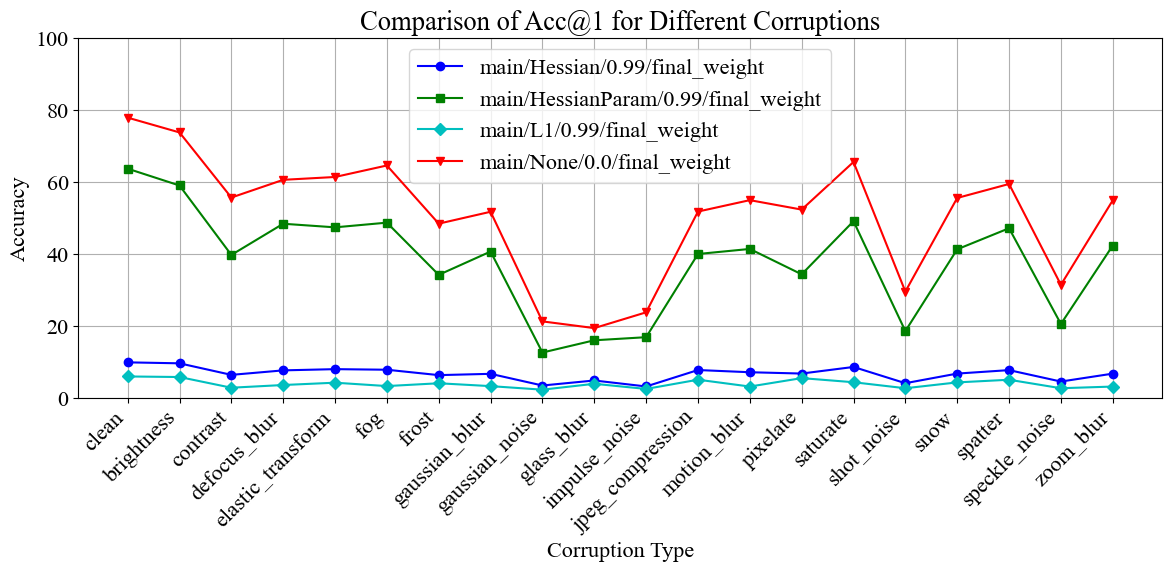

In [58]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import os
import glob
font_path = '/home/ueno/fonts/times.ttf'
fm.fontManager.addfont(font_path)
plt.rcParams['font.family'] = 'Times New Roman'

Acc1_dict = {'clean': [], 'brightness': [], 'contrast': [], 'defocus_blur': [], 'elastic_transform': [], 'fog': [], 'frost': [], 'gaussian_blur': [], 'gaussian_noise': [], 'glass_blur': [],
             'impulse_noise': [], 'jpeg_compression': [], 'motion_blur': [], 'pixelate': [], 'saturate': [], 'shot_noise': [], 'snow': [], 'spatter': [], 'speckle_noise': [], 'zoom_blur': []}
# paths = ['logs/debug/ResNet18/CIFAR10/L1/0.0001/42/0.5/20250109110709/test/100', 'logs/debug/ResNet18/CIFAR10/Hessian/0.0001/42/0.5/20250109131035/test/100']

# paths = sorted(glob.glob('../logs/main/ResNet18/CIFAR10/*/0.1/42/0.99/*/test/final_weight'))
# paths.append('../logs/main/ResNet18/CIFAR10/None/0.1/42/0.0/20250209091815/test/final_weight')

paths = sorted(glob.glob('../logs/main/ResNet18/CIFAR100/*/0.1/42/0.99/*/test/final_weight'))
paths.append('../logs/main/ResNet18/CIFAR100/None/0.1/42/0.0/20250228021055/test/final_weight')

# pop instance include string 'JacobianParam' from paths
paths = [path for path in paths if 'JacobianParam' not in path]


# print(paths)
for path in paths:
    with open(os.path.join(path, 'total_result.txt')) as f:
        lines = f.readlines()
    for line in lines:
        line = line.split(' ')
        # Add the accuracy to the corresponding list
        Acc1_dict[line[1].strip('*')].append(float(line[line.index('Acc@1') + 1]))

Acc1_dict = {k: v for k, v in Acc1_dict.items() if v}
# print(Acc1_dict)
# print(len(Acc1_dict[list(Acc1_dict.keys())[0]]))

# Plot Accuracy and save figure
# xlabel is Acc1_dict key and ylabel is Acc1_dict value
x_labels = list(Acc1_dict.keys())
markars = ['o', 's', 'D', 'v', '^', '<', '>']
colors = ['b', 'g', 'c', 'm', 'y', 'k', 'w']
plt.figure(figsize=(12, 6))
for i in range(len(Acc1_dict[list(Acc1_dict.keys())[0]])-1):
    y_values = [Acc1_dict[key][i] for key in x_labels]
    plt.plot(x_labels, y_values, marker=markars[i], label=(paths[i].split('/')[-10]+'/'+paths[i].split('/')[-7]+'/'+paths[i].split('/')[-4]+'/'+paths[i].split('/')[-1]), color=colors[i], linestyle='-')
y_values = [Acc1_dict[key][i+1] for key in x_labels]
plt.plot(x_labels, y_values, marker=markars[i+1], label=(paths[i+1].split('/')[-10]+'/'+paths[i+1].split('/')[-7]+'/'+paths[i+1].split('/')[-4]+'/'+paths[i+1].split('/')[-1]), color='r', linestyle='-')

plt.xlabel('Corruption Type', fontfamily='Times New Roman')
plt.ylabel('Accuracy', fontfamily='Times New Roman')
plt.title('Comparison of Acc@1 for Different Corruptions', fontfamily='Times New Roman')
plt.xticks(rotation=45, ha='right', fontfamily='Times New Roman')
plt.legend(prop={'family': 'Times New Roman'})
plt.ylim(0, 100)
plt.grid()
plt.tight_layout()
# larger font
plt.rcParams.update({'font.size': 16})

plt.savefig('corruption_comparison.png')
plt.show()

In [59]:
print(Acc1_dict)
acc_list = [0.0 for _ in range(Acc1_dict['clean'].__len__())]
for key in Acc1_dict.keys():
    if key == 'clean':
        continue
    for i in range(Acc1_dict[key].__len__()):
        acc_list[i] += Acc1_dict[key][i]
# 平均ほしい
acc_list = [acc / 19 for acc in acc_list]
for i in range(len(Acc1_dict[list(Acc1_dict.keys())[0]])):
    print('/'+paths[i].split('/')[-7]+'/'+paths[i].split('/')[-4]+'/'+paths[i].split('/')[-1], '【CLEAN】', Acc1_dict['clean'][i], '【NOISE】', round(acc_list[i], 2))

{'clean': [9.94, 63.77, 6.02, 77.96], 'brightness': [9.672, 59.096, 5.864, 73.844], 'contrast': [6.462, 39.794, 2.89, 55.748], 'defocus_blur': [7.712, 48.466, 3.642, 60.674], 'elastic_transform': [8.052, 47.466, 4.286, 61.462], 'fog': [7.89, 48.77, 3.348, 64.66], 'frost': [6.39, 34.26, 4.128, 48.492], 'gaussian_blur': [6.75, 40.74, 3.332, 51.796], 'gaussian_noise': [3.504, 12.668, 2.346, 21.324], 'glass_blur': [4.898, 16.072, 3.982, 19.46], 'impulse_noise': [3.24, 16.934, 2.55, 23.844], 'jpeg_compression': [7.806, 40.058, 5.12, 51.85], 'motion_blur': [7.194, 41.462, 3.216, 55.024], 'pixelate': [6.828, 34.408, 5.558, 52.398], 'saturate': [8.66, 49.178, 4.416, 65.636], 'shot_noise': [4.148, 18.632, 2.746, 29.622], 'snow': [6.82, 41.362, 4.37, 55.63], 'spatter': [7.782, 47.214, 5.108, 59.52], 'speckle_noise': [4.604, 20.614, 2.748, 31.496], 'zoom_blur': [6.804, 42.408, 3.212, 54.966]}
/Hessian/0.99/final_weight 【CLEAN】 9.94 【NOISE】 6.59
/HessianParam/0.99/final_weight 【CLEAN】 63.77 【NOISE

In [5]:
import gzip, pickle
def load_compressed(filename):
    with gzip.open(filename, 'rb') as f:
        return pickle.load(f)
data = load_compressed('/home/ueno/pruning/test/logs/debug/ResNet18/CIFAR10/HessianParam/0.1/42/0.9/20250308165749/prune_info/score_0.gz')

In [6]:
data[-1]

tensor([2.4802e-14, 2.7256e-14, 4.5526e-13,  ..., 2.6600e-21, 5.6735e-13,
        5.8266e-14], device='cuda:0', requires_grad=True)